In [1]:
from julia.api import Julia
import os
os.environ["JULIA_NUM_THREADS"] = "4"
jl = Julia(compiled_modules=False)

In [7]:
print(jl.eval('Threads.nthreads()'))

4


In [8]:
jl.eval('include("plot_all.jl")')
Svd_time, LSQR_seq, LSQR_par = jl.eval('plot_all()')

print(Svd_time)
print(LSQR_seq)
print(LSQR_par)


[{'dim': (50, 50), 'time': 0.007014658}, {'dim': (60, 60), 'time': 0.008326836}, {'dim': (70, 70), 'time': 0.009878321}, {'dim': (80, 80), 'time': 0.011627606}, {'dim': (90, 90), 'time': 0.013276287}, {'dim': (100, 100), 'time': 0.01609638}, {'dim': (110, 110), 'time': 0.022029759}, {'dim': (120, 120), 'time': 0.026270138}, {'dim': (130, 130), 'time': 0.026471982}, {'dim': (140, 140), 'time': 0.030716508}, {'dim': (150, 150), 'time': 0.034290622}]
[{'dim': (50, 50), 'time': 0.131934968}, {'dim': (60, 60), 'time': 0.245318568}, {'dim': (70, 70), 'time': 0.59923952}, {'dim': (80, 80), 'time': 0.524931238}, {'dim': (90, 90), 'time': 1.335718925}, {'dim': (100, 100), 'time': 1.024374048}, {'dim': (110, 110), 'time': 1.965116984}, {'dim': (120, 120), 'time': 2.068023543}, {'dim': (130, 130), 'time': 2.315309724}, {'dim': (140, 140), 'time': 2.862130999}, {'dim': (150, 150), 'time': 3.928714057}]
[{'dim': (50, 50), 'time': 0.286195211}, {'dim': (60, 60), 'time': 0.175759026}, {'dim': (70, 70

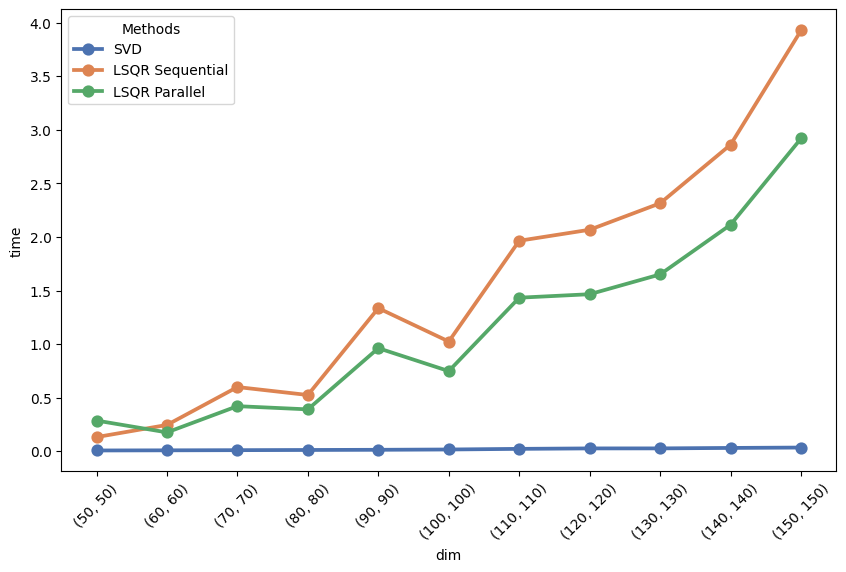

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# # Your data
# data1 = [{'dim': (90, 50), 'time': 0.007954164}, {'dim': (95, 55), 'time': 0.008038622}, {'dim': (100, 60), 'time': 0.008534033}, {'dim': (105, 65), 'time': 0.009281944}]
# data2 = [{'dim': (90, 50), 'time': 6.077339817}, {'dim': (95, 55), 'time': 9.769454199}, {'dim': (100, 60), 'time': 6.612801607}, {'dim': (105, 65), 'time': 6.926171987}]
# data3 = [{'dim': (90, 50), 'time': 4.013967412}, {'dim': (95, 55), 'time': 6.025712728}, {'dim': (100, 60), 'time': 3.897401388}, {'dim': (105, 65), 'time': 4.277641491}]

# Convert to DataFrames
df1 = pd.DataFrame(Svd_time)
df2 = pd.DataFrame(LSQR_seq)
df3 = pd.DataFrame(LSQR_par)

# Add a 'method' column to distinguish the data sources
df1['Methods'] = 'SVD'
df2['Methods'] = 'LSQR Sequential'
df3['Methods'] = 'LSQR Parallel'

# Concatenate the dataframes
df = pd.concat([df1, df2, df3])

# Convert 'dim' to string so it can be used as a categorical variable
df['dim'] = df['dim'].astype(str)

# Create the plot
plt.figure(figsize=(10, 6))
sns.pointplot(data=df, x='dim', y='time', hue='Methods', palette='deep')
plt.xticks(rotation=45)
plt.show()

In [10]:
jl.eval('include("plot_all.jl")')
Svd_A, LSQR_A, LSQR_SVD = jl.eval('gap_k_var()')

print(Svd_A)
print(LSQR_A)
print(LSQR_SVD)

[{'k': 10, 'frobenius_norm': 12.630919050424774}, {'k': 15, 'frobenius_norm': 10.67394382294225}, {'k': 20, 'frobenius_norm': 8.881153532641227}, {'k': 25, 'frobenius_norm': 7.261780352891499}, {'k': 30, 'frobenius_norm': 5.697339221880712}, {'k': 35, 'frobenius_norm': 4.310140280880239}, {'k': 40, 'frobenius_norm': 3.1189839267314374}, {'k': 45, 'frobenius_norm': 2.1115568241823963}, {'k': 50, 'frobenius_norm': 1.1697507050217386}, {'k': 55, 'frobenius_norm': 0.4549685394882647}, {'k': 60, 'frobenius_norm': 4.324710905559617e-14}]
[{'k': 10, 'frobenius_norm': 12.63093002687822}, {'k': 15, 'frobenius_norm': 10.673965336143167}, {'k': 20, 'frobenius_norm': 8.881178945158835}, {'k': 25, 'frobenius_norm': 7.261891469047518}, {'k': 30, 'frobenius_norm': 5.6973723394383855}, {'k': 35, 'frobenius_norm': 4.310174870483227}, {'k': 40, 'frobenius_norm': 3.1190107998155994}, {'k': 45, 'frobenius_norm': 2.1116445007537004}, {'k': 50, 'frobenius_norm': 1.1698050944501257}, {'k': 55, 'frobenius_nor

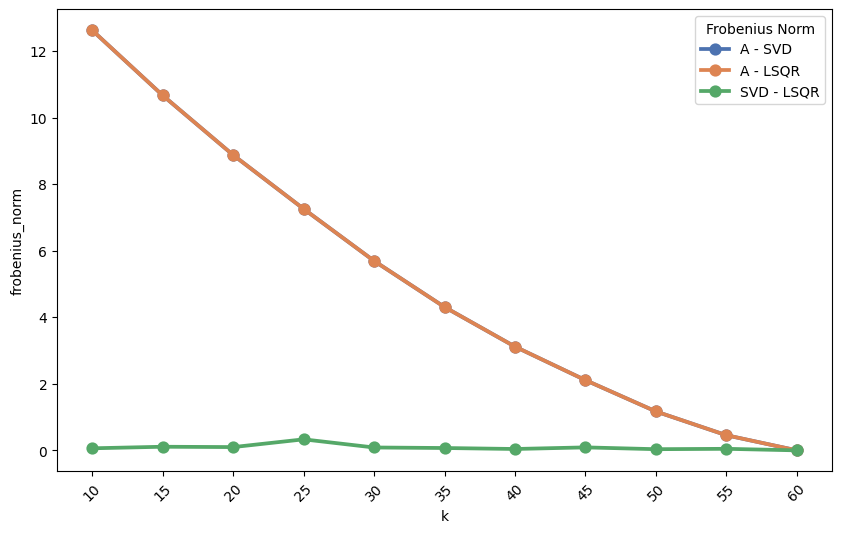

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Convert to DataFrames
df1 = pd.DataFrame(Svd_A)
df2 = pd.DataFrame(LSQR_A)
df3 = pd.DataFrame(LSQR_SVD)

# Add a 'method' column to distinguish the data sources
df1['Frobenius Norm'] = 'A - SVD'
df2['Frobenius Norm'] = 'A - LSQR'
df3['Frobenius Norm'] = 'SVD - LSQR'

# Concatenate the dataframes
df = pd.concat([df1, df2, df3])

# Convert 'dim' to string so it can be used as a categorical variable
#df['dim'] = df['dim'].astype(str)

# Create the plot
plt.figure(figsize=(10, 6))
sns.pointplot(data=df, x='k', y='frobenius_norm', hue='Frobenius Norm', palette='deep')
plt.xticks(rotation=45)
plt.show()